# Visualization of Text Data

In this notebook, we discuss various techniques for visualizing text data.

We divide the text visualization into two parts:

- **Visualization of Documents**
- **Visualization of Words**

### Visualization of Documents

First, we vectorize documents using the following three techniques and then apply dimensionality reduction methods, such as PCA and t-SNE, to project the vectorized documents into 2D for visualization:

1. **Count Vector**
2. **TF-IDF Vector**
3. **Document Embedding using Doc2Vec**

The first two techniques are based on the Bag of Words (BoW) representation, which ignores the order of words in the documents. In contrast, the third technique retains both the semantics and the order of words, allowing for more meaningful visualizations. 

We will observe that the **Document Embedding** technique provides a more insightful visualization compared to the BoW representations, as semantically similar documents will be clustered together.

### Visualization of Words

To visualize words, we utilize two techniques:

1. **Word Cloud**
2. **Word Embedding using Word2Vec**

The first technique, the word cloud, displays words in varying sizes based on their frequency in the corpus, but it does not convey any contextual information. 



The second technique, Word Embedding, converts words into vectors that encode their contextual relationships with other words in the corpus. This method is particularly useful for understanding the semantics of words and for programmatic processing.


Install the following libraries:
- pip install wordcloud
- pip install gensim

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

[nltk_data] Downloading package wordnet to /Users/mhasan2/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Dataset

We create a synthetic corpus of text that contains a set of documents.

In [2]:
# Create a set of documents
documents = [
    "Feynman teaches Physics.",
    "Physics is cool!",
    "Fellini made great movies.",
    "Ross theatre hosts independent movies.",
    "The movie infinity is about Physics and Feynman."
]

#  Add labels to the documents to represent them in visualization
labels = ["Feynman", "Physics", "Fellini", "Theatre", "Movie"]

# Display the documents
j = 1
for i in documents:
    print("Document %d: %s" % (j, i))
    j += 1

Document 1: Feynman teaches Physics.
Document 2: Physics is cool!
Document 3: Fellini made great movies.
Document 4: Ross theatre hosts independent movies.
Document 5: The movie infinity is about Physics and Feynman.


## Visualization Techniques

For visualizing the document vectors and word vectors in 2D, we use two dimensionality reduction techniques:

- PCA
- t-SNE

See the following notebooks for a detail discussion on these techniques:
https://github.com/rhasanbd/Dimensionality-Reduction-Get-More-From-Less-And-See-the-Unseen


We define the following function for generating a 2D plot of the document/word vectors.

In [3]:
def plotData(reduced_values, labels, model_name):
    # get the two principle axes/vectors in two lists
    x = []
    y = []
    for value in reduced_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(10, 6)) 
    plt.title("Visualization by %s" % model_name)
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],  # text of the annotation
                     xy=(x[i], y[i]), # The point (x,y) to annotate.
                     xytext=(5, 2),   # The position (x,y) to place the text at. If None, defaults to xy.
                     textcoords='offset points', # The coordinate system that xy text is given in.
                     ha='right', # horizontal alignment
                     va='bottom') # vertical alignment
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Visualization of Documents


To visualize the documents we need to **vectorize the documents** first.

There are three techniques to do this.
- Count vector
- TF-IDF vector
- Document Embedding using Doc2Vec

See the following notebook for an in-depth understanding of the Count vector and TF-IDF vectorization techniques.
https://github.com/rhasanbd/Text-Analytics-Beginners-Toolbox/blob/master/Text%20Analytics-I-Feature%20Extraction.ipynb


See the following notebook for an in-depth understanding of the Doc2vec vectorization technique.
https://github.com/rhasanbd/Document-Embedding-Doc2vec-Text-Classification



## Count Vector

We represent each document as a vector of the frequency of the words present in the document.

In [4]:
count_vect = CountVectorizer(lowercase=True, stop_words='english')


# Create a matrix representation of the documents
# Each row represents a single document
# Each column represents the term frequecy for each feature
doc_term_matrix = count_vect.fit_transform(documents).todense()


print("\nFeature Names:")
print(count_vect.get_feature_names_out())


print("\nVocabulary: ", count_vect.vocabulary_)
print("Note: After each word the index of that word is given. It's not word count.")


print("\nCount Vector Matrix (Dense Matrix):")
#print(doc_term_matrix.toarray())
print(doc_term_matrix)

# Convert the matrix to a NumPy array
doc_term_matrix = np.asarray(doc_term_matrix)


Feature Names:
['cool' 'fellini' 'feynman' 'great' 'hosts' 'independent' 'infinity'
 'movie' 'movies' 'physics' 'ross' 'teaches' 'theatre']

Vocabulary:  {'feynman': 2, 'teaches': 11, 'physics': 9, 'cool': 0, 'fellini': 1, 'great': 3, 'movies': 8, 'ross': 10, 'theatre': 12, 'hosts': 4, 'independent': 5, 'movie': 7, 'infinity': 6}
Note: After each word the index of that word is given. It's not word count.

Count Vector Matrix (Dense Matrix):
[[0 0 1 0 0 0 0 0 0 1 0 1 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 1 0 1 0 1]
 [0 0 1 0 0 0 1 1 0 1 0 0 0]]


## Count Vector: Visualization by PCA

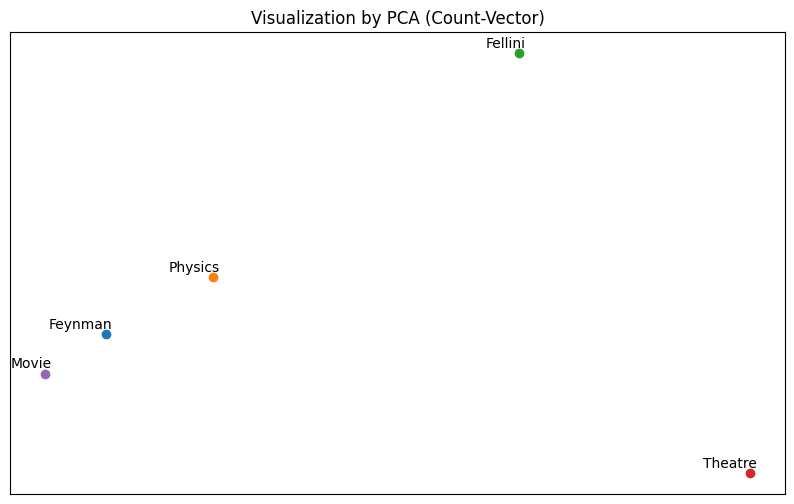

In [5]:
# Extract the first two principal components and transform the word vectors
pca = PCA(n_components=2, random_state=42)

doc_term_matrix_pca = pca.fit_transform(doc_term_matrix)

plotData(doc_term_matrix_pca, labels, "PCA (Count-Vector)")

## Count Vector: Visualization by t-SNE


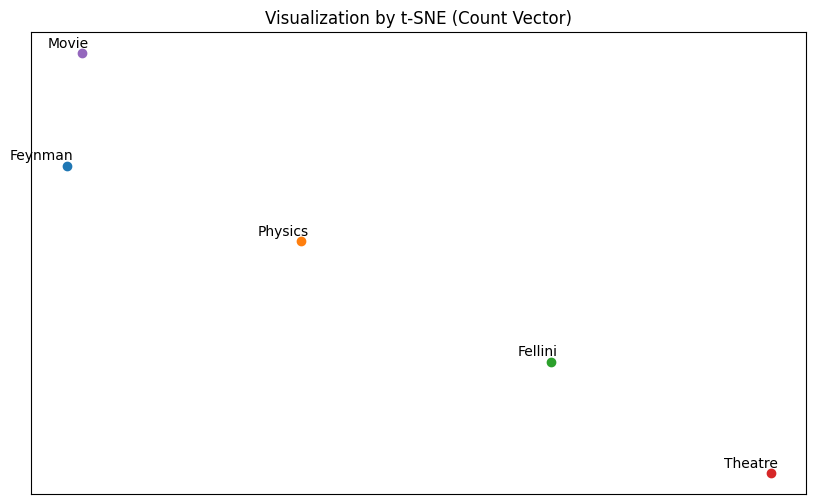

In [6]:
tsne_model = TSNE(n_components=2, perplexity=2, init='pca', n_iter=1000, random_state=23)
doc_term_matrix_tsne = tsne_model.fit_transform(doc_term_matrix)

    
plotData(doc_term_matrix_tsne, labels, "t-SNE (Count Vector)")

## TF-IDF Vector

The term frequency–inverse document frequency (tf–idf) vectorization technique re-weights the count features into floating point values.

In [7]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)


print("\nFeature Names:")
print(tfidf_vectorizer.get_feature_names_out())


print("\nVocabulary:")
print(tfidf_vectorizer.vocabulary_)


print("\nTF-IDF Matrix:")
#print(tfidf_matrix.toarray())


tfidf_matrix= tfidf_matrix.toarray()
print(tfidf_matrix)


Feature Names:
['about' 'and' 'cool' 'fellini' 'feynman' 'great' 'hosts' 'independent'
 'infinity' 'is' 'made' 'movie' 'movies' 'physics' 'ross' 'teaches' 'the'
 'theatre']

Vocabulary:
{'feynman': 4, 'teaches': 15, 'physics': 13, 'is': 9, 'cool': 2, 'fellini': 3, 'made': 10, 'great': 5, 'movies': 12, 'ross': 14, 'theatre': 17, 'hosts': 6, 'independent': 7, 'the': 16, 'movie': 11, 'infinity': 8, 'about': 0, 'and': 1}

TF-IDF Matrix:
[[0.         0.         0.         0.         0.55681615 0.
  0.         0.         0.         0.         0.         0.
  0.         0.4622077  0.         0.69015927 0.         0.        ]
 [0.         0.         0.69015927 0.         0.         0.
  0.         0.         0.         0.55681615 0.         0.
  0.         0.4622077  0.         0.         0.         0.        ]
 [0.         0.         0.         0.52335825 0.         0.52335825
  0.         0.         0.         0.         0.52335825 0.
  0.42224214 0.         0.         0.         0.        

## TF-IDF Vector: Visualization by PCA

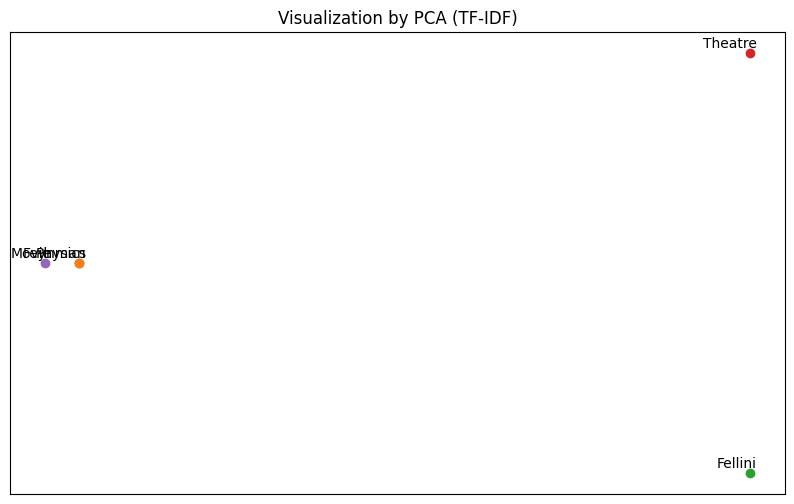

In [8]:
# Extract the first two principal components and transform the word vectors
pca = PCA(n_components=2, random_state=42)

tfidf_matrix_pca = pca.fit_transform(tfidf_matrix)

plotData(tfidf_matrix_pca, labels, "PCA (TF-IDF)")

## TF-IDF Vector: Visualization by t-SNE

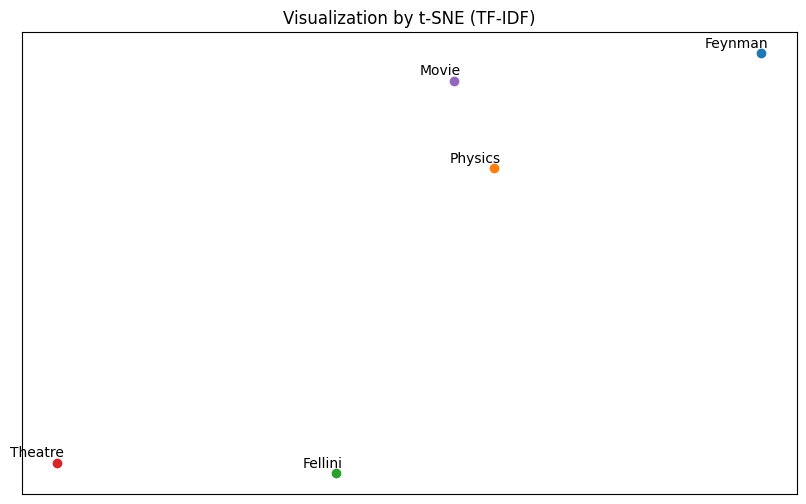

In [9]:
tsne_model = TSNE(n_components=2, perplexity=2, init='pca', n_iter=1000, random_state=23)
tfidf_matrix_tsne = tsne_model.fit_transform(tfidf_matrix)

    
plotData(tfidf_matrix_tsne, labels, "t-SNE (TF-IDF)")

## Document Embedding using Doc2Vec

The Gensim Doc2vector model requires the corpus as a list of lists containing tokenized words per document and document tags, as shown below.

    ['feynman', 'teach', 'physic'], [0] 
    ['physic', 'cool'], [1]


Thus, before we perform document embedding, we need to **pre-process** the data by implementing the following steps:
- Create a list of documents
- Convert it to a list of lists containing tokenized words
- Create tagged documents with tokenized words

### Preprocess Data for the Doc2Vector Model

In [10]:
# Create a list of sentences
docs_array = []

j = 1
for i in documents:
    docs_array.append(i)


# Convert the list as a NumPy array
docs_array = np.array(docs_array, dtype=object)
print(docs_array)

['Feynman teaches Physics.' 'Physics is cool!'
 'Fellini made great movies.' 'Ross theatre hosts independent movies.'
 'The movie infinity is about Physics and Feynman.']


## Convert a list of sentences to a list of lists containing tokenized words

In [11]:
# Function for convert a list of sentences to a list of lists containing tokenized words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+') # Tokenize the words.
    
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

## Convert the 2D Document Array into a 2D Array of Tokenized Words

In [12]:
# Convert a list of sentences to a list of lists containing tokenized words
docs = docs_preprocessor(docs_array)
print(docs)

[['feynman', 'teach', 'physic'], ['physic', 'cool'], ['fellini', 'made', 'great', 'movie'], ['ross', 'theatre', 'host', 'independent', 'movie'], ['movie', 'infinity', 'about', 'physic', 'feynman']]


## Create Tagged Documents


For training the Doc2vec model, we need to create tagged documents.

A single document, made up of words and tags.

In [13]:
# Create Tagged documents
documents_tagged = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]
print(documents_tagged[0])

TaggedDocument<['feynman', 'teach', 'physic'], [0]>


## Train Doc2Vec Model


See the notebook on Doc2vec word embedding for an in-depth understanding of this technique.

In [14]:
# Set training parameters
doc_vector_length = 100       # Dimension of the document vector
window_size = 2               # We set it 2 as the sentences weren't too long
epochs = 100                  # Number of iterations (epochs) over the corpus
min_count = 1                 # Ignores all words with total frequency lower than min_count
workers = 4                   # Number of worker threads to train the model

In [15]:
%%time

# Create the Doc2vec model using gensim (If dm=1, ‘distributed memory’ (DM) algorithm is used)
model = Doc2Vec(vector_size=doc_vector_length, dm=1, window=window_size, min_count=min_count, 
                workers=workers, sample=0.01, epochs=epochs)
# Create vocabulary
model.build_vocab(documents_tagged)

# Train the model
model.train(documents_tagged, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 21.5 ms, sys: 19.8 ms, total: 41.4 ms
Wall time: 31.3 ms


In [16]:
print("Vocabulary Size: ", len(model.wv.index_to_key))

Vocabulary Size:  14


## Get The Emabedded Documents as a Data Matrix

In [17]:
noOfDocuments = len(documents)

embedded_doc_data_matrix = np.empty([noOfDocuments, doc_vector_length])

for i in range(noOfDocuments):
    embedded_doc_data_matrix[i] = model.dv[i].reshape(1, -1)
    
print(embedded_doc_data_matrix.shape)
#print(embedded_doc_data_matrix[0])

(5, 100)


## Document Embedding: Visualization by PCA

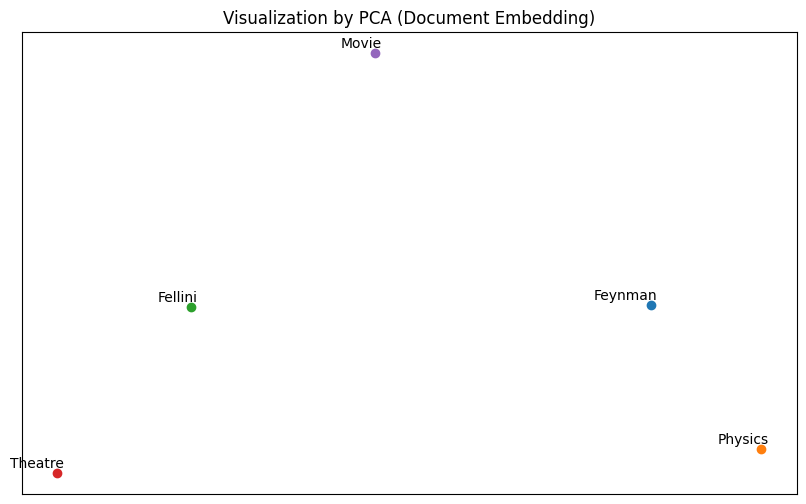

In [18]:
# Extract the first two principal components and transform the word vectors
pca = PCA(n_components=2, random_state=42)

doc2vec_matrix_pca = pca.fit_transform(embedded_doc_data_matrix)

plotData(doc2vec_matrix_pca, labels, "PCA (Document Embedding)")

## Document Embedding: Visualization by t-SNE

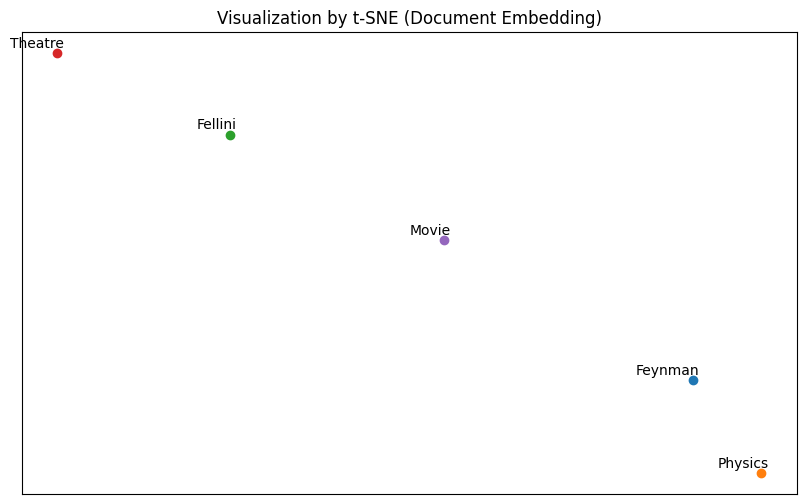

In [19]:
tsne_model = TSNE(n_components=2, perplexity=2, init='pca', n_iter=1000, random_state=23)
doc2vec_matrix_tsne = tsne_model.fit_transform(embedded_doc_data_matrix)
    
plotData(doc2vec_matrix_tsne, labels, "t-SNE (Document Embedding)")

# Visualization of Documents: Observation

We used the following three document vectorization technique for visualization using PCA and t-SNE.

- Count vector
- TF-IDF vector
- Document Embedding using Doc2Vec


We observe that the **document embedding** technique provides the best representation of the documents for visualization using t-SNE.

# Visualization of Words

To visualize individual words we use two techniques.
- Word Cloud
- Word Embedding by Word2vec

The word cloud based technique represents the frequency of words in the corpus. It does not provide any contextual information. It doesn't vectorize the words.

The Word2vec word embedding technique encodes the context of the words in its vector representation. See the following notebook for an in-depth understanding of the Word2vec vectorization technique.
https://github.com/rhasanbd/Word-Embedding-by-Word2vec

## Word Cloud

One way to analyze text is to use word clouds. Word clouds can help us see what seems to matter to us the most relative to other things.

A Word Cloud or Tag Cloud is a visual representation of text data in the form of tags, which are typically single words whose importance is visualized by way of their size and color. 

As **unstructured data** in the form of text continues to see unprecedented growth, especially within the field of social media, there is an ever-increasing need to analyze the massive amounts of text generated from these systems. A Word Cloud is an excellent option to help visually interpret text and is useful in quickly gaining insight into the most prominent items in a given text, by visualizing the word frequency in the text as a weighted list.

We use Python's matplotlib and wordcloud libraries to generate word cloud. 


### Install WordCloud

To install WordCloud, use the following 3 commands on Terminal/Prompt:
- git clone https://github.com/amueller/word_cloud.git
- cd word_cloud
- pip install .

You may need to use the following command:

    python -m pip install wordcloud

Then, import WordCloud as follows.

- from wordcloud import WordCloud

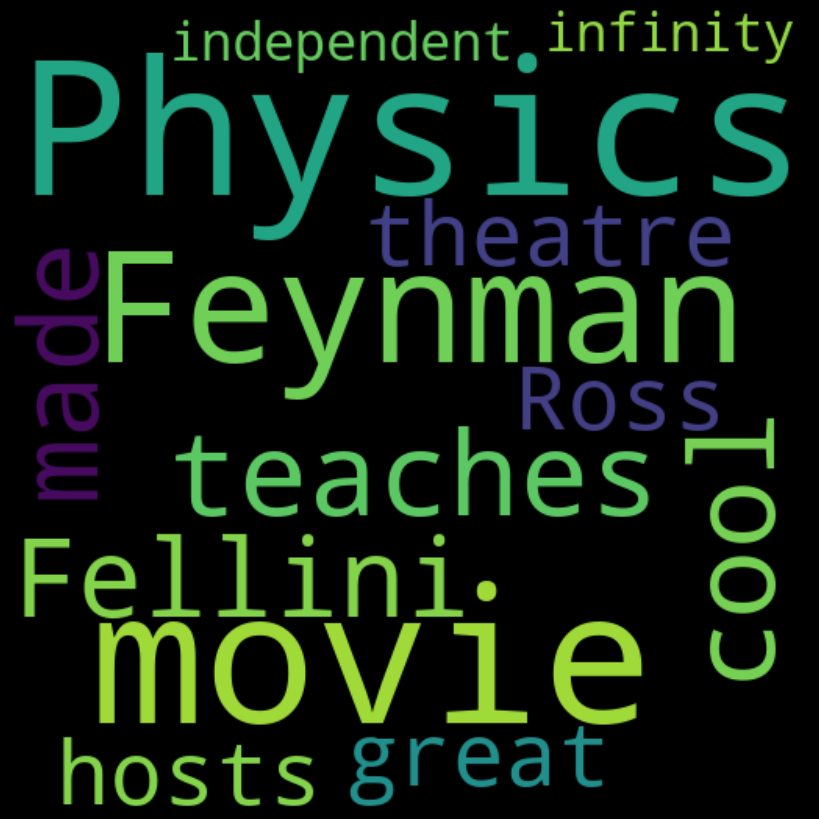

In [20]:
# Create a list of words from the text corpus
all_words = ' '.join(list(documents))

word_cloud = WordCloud(width = 512,height = 512).generate(all_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Word2vec


The Gensim Word2vector model requires the corpus as a list of lists containing tokenized words, as follows.

[['feynman', 'teach', 'physic'], 
['physic', 'cool']]


- First we create a list of sentences
- Then, convert it to a list of lists containing tokenized words

### Preprocess Data for the Word2Vector Model

In [21]:
# Create a list of sentences
docs_array = []

j = 1
for i in documents:
    docs_array.append(i)


# Convert the list as a NumPy array
docs_array = np.array(docs_array, dtype=object)
print(docs_array)

['Feynman teaches Physics.' 'Physics is cool!'
 'Fellini made great movies.' 'Ross theatre hosts independent movies.'
 'The movie infinity is about Physics and Feynman.']


## Convert a list of sentences to a list of lists containing tokenized words

In [22]:
# Convert a list of sentences to a list of lists containing tokenized words
docs = docs_preprocessor(docs_array)
print(docs)

[['feynman', 'teach', 'physic'], ['physic', 'cool'], ['fellini', 'made', 'great', 'movie'], ['ross', 'theatre', 'host', 'independent', 'movie'], ['movie', 'infinity', 'about', 'physic', 'feynman']]


## Train Word2Vec Model

See the notebook on Word2vec word embedding technique for an in-depth understanding of this technique.

In [23]:
# Set training parameters
size = 100       # Dimension of the word vector
window_size = 2  # We set it 2 as the sentences weren't too long
epochs = 100     # Number of iterations (epochs) over the corpus.
min_count = 1    # Ignores all words with total frequency lower than this.
workers = 4

# Train Word2vec model using gensim (use the skip-gram model: sg = 1)
%time 
model = Word2Vec(docs, sg=1,window=window_size,vector_size=size, 
                       min_count=min_count,workers=workers,epochs=epochs,sample=0.01)

CPU times: user 9 µs, sys: 18 µs, total: 27 µs
Wall time: 4.05 µs


In [24]:
print("Vocabulary: ")

for word in model.wv.index_to_key:
    print(" ", word)

Vocabulary: 
  movie
  physic
  feynman
  about
  infinity
  independent
  host
  theatre
  ross
  great
  made
  fellini
  cool
  teach


## 2D Visualization of Word Vectors using t-SNE

In [25]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = [] # stores the words (labels)
    tokens = [] # stores word vectors

    for word in model.wv.index_to_key:
        #tokens.append(model[word])
        tokens.append(model.wv.__getitem__(word))
        labels.append(word)

    # Convert tokens list to a NumPy array
    tokens = np.array(tokens)
    
    #tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=23)
    tsne_model = TSNE(n_components=2, perplexity=3)
    new_values = tsne_model.fit_transform(tokens)

    # get the two coordinates in two lists
    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 6)) 
    plt.title("Visualizing Word Vectors in 2D")
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],  # text of the annotation
                     xy=(x[i], y[i]), # The point (x,y) to annotate.
                     xytext=(5, 2),   # The position (x,y) to place the text at. If None, defaults to xy.
                     textcoords='offset points', # The coordinate system that xytext is given in.
                     ha='right', # horizontal alignment
                     va='bottom') # vertical alignment
    plt.xticks([])
    plt.yticks([])
    plt.show()

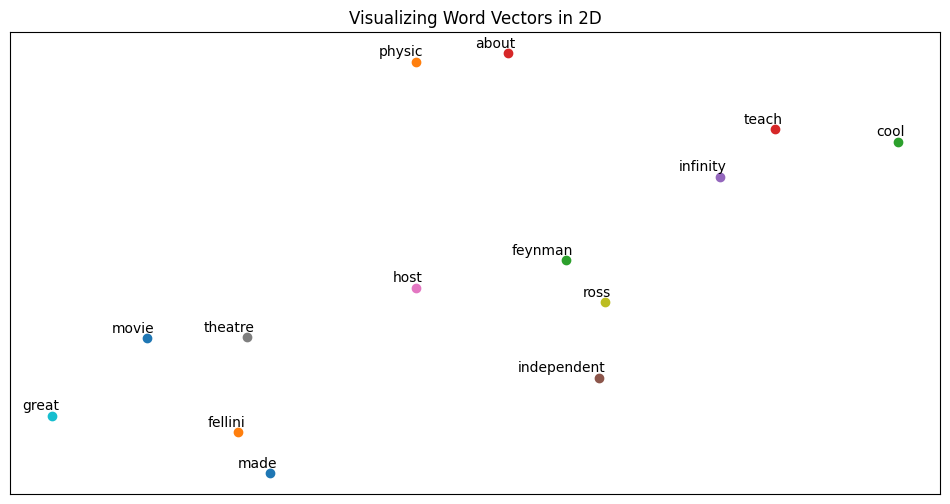

In [26]:
tsne_plot(model)